<h1> Cast the problem of bi-gram character level language modeling into the neural network framework</h1>



In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
# making the dictionary to save the pair of token of words 
b={}
for w in words[:]:
    ch = ['<S>']+ list(w) + ['<E>']
    for ch1, ch2 in zip(ch, ch[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram , 0)+ 1
#         print(ch1, ch2)
                               

In [4]:
sorted(b.items() , key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch
N = torch.zeros((27,27), dtype = torch.int32)

In [6]:
chars  = sorted(list(set(''.join(words))))
s_to_i = {s:i+1 for i,s in enumerate(chars)}  # here we are starting from 1 --> a
s_to_i['.'] = 0 # here we are gonna rep. the dot with a 0
s_to_i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [7]:
i_to_s = {i:s for s,i in s_to_i.items()}
i_to_s

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [8]:
# create the training set of bigrams (x,y) --- in this we will be given with the first char of the bigram and we are gonna predict the next one 

xs, ys = [], [] 

for w in words[:1]:
    chs = ['.']+ list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
# torch.tensor(xs) --> have data type of torch.int64
# torch.Tensor(xs) --> have data type of torch.float32
# so it is advised to use small t wala tensor 

. e
e m
m m
m a
a .


In [9]:
# as saw in the neural network this is the vector of input 
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
# as saw in the neural network this is the vector for output corresponding to the input  
ys

tensor([ 5, 13, 13,  1,  0])

so from the above eg we get <br>

If the input is 0 then the weights gets arranged in such a way that it gives higher probab. to 5<br>

and similarly 
for input 5 it should output 13<br>

and for 13 we should have high probability for 13 and 1 cuz' in above eg we are getting both 13 and 1 as the output

In [11]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
xenc.shape

torch.Size([5, 27])

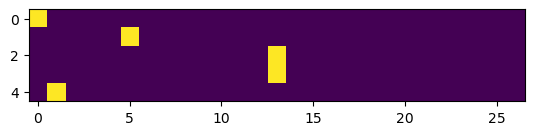

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

plt.imshow(xenc)

In [48]:
xenc.dtype

torch.float32

In [49]:
W = torch.randn((27, 27)) #-->it returns a tensor filled with random numbers from a notmal distribution with mean 0 and variance 1
xenc @ W # @---> is the matrix multiplication operator in pytorch 


tensor([[-1.1407e+00, -3.9390e-01, -1.2466e+00,  3.2812e-01, -1.6429e-01,
          2.2755e-01,  1.4857e-01, -1.1879e+00, -1.3418e+00,  1.5816e+00,
         -9.7445e-01,  4.3036e-01,  7.2853e-01, -4.8896e-01,  8.0670e-01,
          3.6872e-01, -7.9320e-02, -2.0618e-01,  3.8349e-01, -2.3429e-01,
         -9.5583e-01, -5.5101e-01,  6.4374e-01,  1.2524e+00, -9.0073e-01,
         -1.1895e+00, -6.7911e-01],
        [ 7.9991e-01, -3.9723e-01,  9.6029e-01, -5.2726e-01, -1.0260e+00,
         -6.1431e-01,  3.7970e-01, -2.0867e+00,  9.3030e-01,  7.0047e-01,
          1.3679e+00, -1.2359e+00,  2.9912e+00,  5.1322e-01,  9.1668e-01,
         -7.5184e-01, -7.4688e-01,  1.0946e+00, -1.0152e+00, -1.7506e-01,
          3.1249e-01,  2.9969e-01,  8.7863e-01, -2.9870e-01, -1.6031e-03,
          5.1112e-01,  1.5860e+00],
        [ 6.2858e-01,  1.2421e+00,  1.2214e+00,  1.3610e+00, -1.4148e+00,
          1.4137e+00, -9.6227e-01, -4.3278e-01,  7.3170e-01, -4.8595e-01,
          1.1564e+00,  4.8767e-01, -4.67

In [50]:
(xenc@ W).shape

torch.Size([5, 27])

In [51]:
(xenc@ W).exp()

tensor([[ 0.3196,  0.6744,  0.2875,  1.3884,  0.8485,  1.2555,  1.1602,  0.3049,
          0.2614,  4.8629,  0.3774,  1.5378,  2.0720,  0.6133,  2.2405,  1.4459,
          0.9237,  0.8137,  1.4674,  0.7911,  0.3845,  0.5764,  1.9036,  3.4988,
          0.4063,  0.3044,  0.5071],
        [ 2.2253,  0.6722,  2.6125,  0.5902,  0.3584,  0.5410,  1.4618,  0.1241,
          2.5353,  2.0147,  3.9273,  0.2906, 19.9097,  1.6707,  2.5010,  0.4715,
          0.4738,  2.9880,  0.3623,  0.8394,  1.3668,  1.3494,  2.4076,  0.7418,
          0.9984,  1.6672,  4.8842],
        [ 1.8750,  3.4628,  3.3918,  3.9001,  0.2430,  4.1110,  0.3820,  0.6487,
          2.0786,  0.6151,  3.1784,  1.6285,  0.6265,  0.4351,  5.8861,  2.0903,
          0.8871,  2.5223,  0.8491,  1.4467,  6.0407,  1.5228,  0.4954,  1.1279,
          0.2494,  0.6328,  0.8717],
        [ 1.8750,  3.4628,  3.3918,  3.9001,  0.2430,  4.1110,  0.3820,  0.6487,
          2.0786,  0.6151,  3.1784,  1.6285,  0.6265,  0.4351,  5.8861,  2.0903

In [52]:
# (5, 27) @ (27 , 27) the dot product will give --> (5, 27) 
# that (5,27) matrix will give us the log values no the probability

In [53]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N--> refering to the blue table in the previous notebook
probs = counts/ counts.sum(1, keepdims=True)
probs

tensor([[0.0102, 0.0216, 0.0092, 0.0445, 0.0272, 0.0402, 0.0372, 0.0098, 0.0084,
         0.1557, 0.0121, 0.0492, 0.0664, 0.0196, 0.0717, 0.0463, 0.0296, 0.0261,
         0.0470, 0.0253, 0.0123, 0.0185, 0.0610, 0.1120, 0.0130, 0.0097, 0.0162],
        [0.0371, 0.0112, 0.0436, 0.0098, 0.0060, 0.0090, 0.0244, 0.0021, 0.0423,
         0.0336, 0.0655, 0.0048, 0.3319, 0.0279, 0.0417, 0.0079, 0.0079, 0.0498,
         0.0060, 0.0140, 0.0228, 0.0225, 0.0401, 0.0124, 0.0166, 0.0278, 0.0814],
        [0.0366, 0.0676, 0.0662, 0.0762, 0.0047, 0.0803, 0.0075, 0.0127, 0.0406,
         0.0120, 0.0621, 0.0318, 0.0122, 0.0085, 0.1150, 0.0408, 0.0173, 0.0493,
         0.0166, 0.0283, 0.1180, 0.0297, 0.0097, 0.0220, 0.0049, 0.0124, 0.0170],
        [0.0366, 0.0676, 0.0662, 0.0762, 0.0047, 0.0803, 0.0075, 0.0127, 0.0406,
         0.0120, 0.0621, 0.0318, 0.0122, 0.0085, 0.1150, 0.0408, 0.0173, 0.0493,
         0.0166, 0.0283, 0.1180, 0.0297, 0.0097, 0.0220, 0.0049, 0.0124, 0.0170],
        [0.0354, 0.0091,

In [54]:
probs[0]

tensor([0.0102, 0.0216, 0.0092, 0.0445, 0.0272, 0.0402, 0.0372, 0.0098, 0.0084,
        0.1557, 0.0121, 0.0492, 0.0664, 0.0196, 0.0717, 0.0463, 0.0296, 0.0261,
        0.0470, 0.0253, 0.0123, 0.0185, 0.0610, 0.1120, 0.0130, 0.0097, 0.0162])

In [55]:
probs[0].sum()

tensor(1.0000)

In [56]:
probs[0].shape

torch.Size([27])

In [57]:
## Summaryyy-------------------------->


In [58]:
xs

tensor([ 0,  5, 13, 13,  1])

In [59]:
ys

tensor([ 5, 13, 13,  1,  0])

In [60]:
#randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [61]:
xenc = F.one_hot(xs, num_classes = 27).float() # input to the network : one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts/ counts.sum(1, keepdims = True) # probab. for next char

# the last two lines here together are called as softmax

In [62]:
probs.shape

torch.Size([5, 27])

In [63]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {i_to_s[x]}{i_to_s[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [64]:
# ----------!!!Optimization!!!------------------

In [65]:
xs 

tensor([ 0,  5, 13, 13,  1])

In [66]:
ys

tensor([ 5, 13, 13,  1,  0])

In [67]:
#randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad= True)

In [68]:
# forward pass 
xenc = F.one_hot(xs, num_classes= 27).float() # input to the network: one- hot encoding
logits = xenc @W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims = True) # probab. for next character
loss = -probs[torch.arange(5), ys].log().mean() # here we have implemented the loss as forward pass

In [69]:
probs.shape

torch.Size([5, 27])

In [70]:
# as we are doing classification that why we are using negative log_likelihood instead to mean squared error 
#([     5,          13,          13,          1,          0])
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [71]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [72]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [73]:
# backward pass -----------
W.grad = None # set to zero the gradient
loss.backward()

In [74]:
W.shape

torch.Size([27, 27])

In [75]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [76]:
#update-----------
W.data += -0.1 *W.grad

<h1> FINAL CODE</h1>

In [84]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = s_to_i[ch1]
    ix2 = s_to_i[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [86]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad #in this 50 is the learning rate

2.511415481567383
2.4843733310699463
2.482968330383301
2.4828999042510986
2.482862710952759
2.482832670211792
2.4828059673309326
2.482780694961548
2.4827563762664795
2.4827325344085693
2.482710123062134
2.48268723487854
2.4826653003692627
2.4826438426971436
2.4826221466064453
2.4826014041900635
2.4825804233551025
2.482560157775879
2.4825398921966553
2.4825198650360107
2.4825003147125244
2.482481002807617
2.48246169090271
2.482442855834961
2.482424020767212
2.482405424118042
2.4823873043060303
2.4823696613311768
2.4823520183563232
2.4823343753814697
2.4823169708251953
2.482300043106079
2.482283115386963
2.482266902923584
2.482250452041626
2.482234239578247
2.482217788696289
2.4822020530700684
2.4821865558624268
2.482171058654785
2.4821557998657227
2.4821410179138184
2.4821255207061768
2.4821112155914307
2.4820966720581055
2.4820821285247803
2.4820680618286133
2.4820539951324463
2.4820396900177
2.4820261001586914
2.4820125102996826
2.481999397277832
2.4819858074188232
2.4819726943969727


In [79]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(i_to_s[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.
